<h1><center>CREDIT CARD PAYMENTS ANALYSIS</center></h1>

This notebook is to analyze the clients' history with *revolving credits* using the Credit Card Payment data. **Revolving Credits**, unlike installment-based credit models:
- Do not have a *fixed* number of payments or a *fixed* periodic amount.
- Have periodic payments **decided by the amount used in that period**.
- Can be used while paying the periodic payments, **as long as the limit is not reached**.

The installment-based credit models are based on the principle of *fixed payments within fixed time period with no renewal*.

In this notebook, the analysis shall be carried out using the **credit_card_balance.csv** file. Using this data, we shall try to find the following:
- **Credit Utilization Ratio** , i.e. the fraction/percentage of maximum credit limit utilzed by the client.
- **Ratio of the paid amount to the owed amount**.
- **Surcharge levied**.
- **Average amount withdrawn per withdrawal**.
- **Tolerance days** and the **DPD despite tolerance**.
- **The category of the credit**.

The resultant feature space can be combined with other tables in the dataset to gain more insights about the clients.

<h2><center>Table of Content</center></h2>

- [1. Libraries and Constants](#1)
- [2. Getting the Tables](#2)
- [3. Analyzing credit_card_balance.csv Table](#3)
    - [3.1 Table Information](#3.1)
    - [3.2 Missing Values](#3.2)
    - [3.3 Univariate Analysis](#3.3)
        - [3.3.1 Analyzing the SK_ID_PREV Variable](#3.3.1)
        - [3.3.2 Analyzing the SK_ID_CURR Variable](#3.3.2)
        - [3.3.3 Analyzing the MONTHS_BALANCE Variable](#3.3.3)
        - [3.3.4 Analyzing the AMT_BALANCE Variable](#3.3.4)
        - [3.3.5 Analyzing the AMT_CREDIT_LIMIT_ACTUAL Variable](#3.3.5)
        - [3.3.6 Analyzing the AMT_DRAWINGS_ATM_CURRENT Variable](#3.3.6)
        - [3.3.7 Analyzing the AMT_DRAWINGS_CURRENT Variable](#3.3.7)
            - [3.3.7.1 Checking Data Integrity](#3.3.7.1)
            - [3.3.7.2 Describing the Variable](#3.3.7.2)
        - [3.3.8 Analyzing the AMT_DRAWINGS_OTHER_CURRENT Variable](#3.3.8)
        - [3.3.9 Analyzing the AMT_DRAWINGS_POS_CURRENT Variable](#3.3.9)
        - [3.3.10 Analyzing the AMT_INST_MIN_REGULARITY Variable](#3.3.10)
        - [3.3.11 Analyzing the AMT_PAYMENT_CURRENT Variable](#3.3.11)
        - [3.3.12 Analyzing the AMT_PAYMENT_TOTAL_CURRENT Variable](#3.3.12)
        - [3.3.13 Analyzing the AMT_RECEIVABLE_PRINCIPAL Variable](#3.3.13)
        - [3.3.14 Analyzing the AMT_RECIVABLE Variable](#3.3.14)
        - [3.3.15 Analyzing the AMT_TOTAL_RECEIVABLE Variable](#3.3.15)
        - [3.3.16 Analyzing the CNT_DRAWINGS_ATM_CURRENT Variable](#3.3.16)
        - [3.3.17 Analyzing the CNT_DRAWINGS_CURRENT Variable](#3.3.17)
            - [3.3.17.1 Checking Data Integrity](#3.3.17.1)
            - [3.3.17.2 Describing the Variable](#3.3.17.2)
        - [3.3.18 Analyzing the CNT_DRAWINGS_OTHER_CURRENT Variable](#3.3.18)
        - [3.3.19 Analyzing the CNT_DRAWINGS_POS_CURRENT Variable](#3.3.19)
        - [3.3.20 Analyzing the CNT_INSTALMENT_MATURE_CUM Variable](#3.3.20)
        - [3.3.21 Analyzing the NAME_CONTRACT_STATUS Variable](#3.3.21)
        - [3.3.22 Analyzing the SK_DPD Variable](#3.3.22)
        - [3.3.23 Analyzing the SK_DPD_DEF Variable](#3.3.23)
    - [3.4 Multivariate Analysis](#3.4)
- [4. Getting the Resultant Feature Space](#4)
    - [4.1 Saving the Feature Space](#4.1)

<h2><div id="1">1 : Libraries and Constants</div></h2>

In [1]:
import os

In [2]:
# Going two folders back from the CWD i.e. EDA:

os.chdir("..")
os.chdir("..")

In [3]:
# Now we are in the actual root directory of the project:

ROOT_DIR = os.getcwd()
ROOT_DIR

'C:\\Users\\KIIT\\Desktop\\Home Credit Default Risk'

In [4]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import src.eda.visualization as plotter
import src.eda.tabular as tab
import src.fe.credit_card as cc_fe

In [6]:
warnings.filterwarnings("ignore")

<h2><div id="2">2 : Getting the Tables</div></h2>

In [7]:
cc_balance = pd.read_csv(
    os.path.join(ROOT_DIR,"data","original","credit_card_balance.csv")
)
cc_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


<h2><div id="3">3 : Analyzing credit_card_balance.csv File</div></h2>

<h3><div id="3.1">3.1 : Table Information</div></h3>

In [8]:
cc_balance.shape

(3840312, 23)

There are 38,40,312 records and 23 atrributes in the table.

In [9]:
cc_balance.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')

Out of 8 attributes in the file, *SK_ID_CURR* and *SK_ID_PREV* uniquely identify the records in the *application_train.csv* and *previous_application.csv* files respectively.

Because these are hash values, these are not subject to multivariate analysis with other variables.However, we can use them to calculate the number of previous applications (using SK_ID_PREV attribute) and number of clients (using SK_ID_CURR) that have availed the installment-based cash credit.

Apart from this, it appears that:
- **The column AMT_DRAWINGS_CURRENT has been broken down into AMT_DRAWINGS_ATM_CURRENT, AMT_DRAWINGS_POS_CURRENT and AMT_DRAWINGS_OTHER_CURRENT**.
- **The column CNT_DRAWINGS_CURRENT has been broken down into CNT_DRAWINGS_ATM_CURRENT, CNT_DRAWINGS_POS_CURRENT and CNT_DRAWINGS_OTHER_CURRENT**.

Given this information, **we can check the *integrity* of the data** by:
- **Comparing the sum of AMT_DRAWINGS_ATM_CURRENT, AMT_DRAWINGS_POS_CURRENT and AMT_DRAWINGS_OTHER_CURRENT with AMT_DRAWINGS_CURRENT ([see Section 3.3.7.1](#3.3.7.1))**.
- **Comparing the sum of CNT_DRAWINGS_ATM_CURRENT, CNT_DRAWINGS_POS_CURRENT and CNT_DRAWINGS_OTHER_CURRENT with CNT_DRAWINGS_CURRENT ([see Section 3.3.17.1](#3.3.17.1))**.

In [10]:
cc_balance.dtypes

SK_ID_PREV                      int64
SK_ID_CURR                      int64
MONTHS_BALANCE                  int64
AMT_BALANCE                   float64
AMT_CREDIT_LIMIT_ACTUAL         int64
AMT_DRAWINGS_ATM_CURRENT      float64
AMT_DRAWINGS_CURRENT          float64
AMT_DRAWINGS_OTHER_CURRENT    float64
AMT_DRAWINGS_POS_CURRENT      float64
AMT_INST_MIN_REGULARITY       float64
AMT_PAYMENT_CURRENT           float64
AMT_PAYMENT_TOTAL_CURRENT     float64
AMT_RECEIVABLE_PRINCIPAL      float64
AMT_RECIVABLE                 float64
AMT_TOTAL_RECEIVABLE          float64
CNT_DRAWINGS_ATM_CURRENT      float64
CNT_DRAWINGS_CURRENT            int64
CNT_DRAWINGS_OTHER_CURRENT    float64
CNT_DRAWINGS_POS_CURRENT      float64
CNT_INSTALMENT_MATURE_CUM     float64
NAME_CONTRACT_STATUS           object
SK_DPD                          int64
SK_DPD_DEF                      int64
dtype: object

As per the description provided as a part of the dataset and looking at the data type of the attributes, all the columns seem to be numeric (since dtype is float64 and int64).

However, the column *NAME_CONTRACT_STATUS* is a categorical variable, evident from the fact that its dtype is object. For this, we shall create dummy variables for the unique and rare categories in this attribute. This may prove to be a good dicriminator for classification.

<h3><div id="3.2">3.2 : Missing Values</div></h3>

In [11]:
tab.get_missing_values(cc_balance)

,Column,Missing Values,Missing Values by %
0,SK_ID_PREV,0,0.000
1,SK_ID_CURR,0,0.000
2,MONTHS_BALANCE,0,0.000
3,AMT_BALANCE,0,0.000
4,AMT_CREDIT_LIMIT_ACTUAL,0,0.000
5,AMT_DRAWINGS_ATM_CURRENT,749816,19.525
6,AMT_DRAWINGS_CURRENT,0,0.000
7,AMT_DRAWINGS_OTHER_CURRENT,749816,19.525
8,AMT_DRAWINGS_POS_CURRENT,749816,19.525
9,AMT_INST_MIN_REGULARITY,305236,7.948


As observable above, the columns **AMT_DRAWINGS_ATM_CURRENT**, **AMT_DRAWINGS_OTHER_CURRENT** and **AMT_DRAWINGS_POS_CURRENT** have the same number of missing values i.e. **749816**. Their corresponding columns (with matching names) **CNT_DRAWINGS_ATM_CURRENT**, **CNT_DRAWINGS_OTHER_CURRENT** and **CNT_DRAWINGS_POS_CURRENT** also have the same number of missing columns.

Therefore, we must check if NaN values are occurring simultaneously across these attributes.

In [12]:
cc_balance[
    (cc_balance["AMT_DRAWINGS_ATM_CURRENT"].isna()) &
    (cc_balance["AMT_DRAWINGS_OTHER_CURRENT"].isna()) &
    (cc_balance["AMT_DRAWINGS_POS_CURRENT"].isna()) &
    (cc_balance["CNT_DRAWINGS_ATM_CURRENT"].isna()) &
    (cc_balance["CNT_DRAWINGS_OTHER_CURRENT"].isna()) &
    (cc_balance["CNT_DRAWINGS_POS_CURRENT"].isna())
].shape

(749816, 23)

We can see that the NaN values for all these attributes occur *simultaneously* since the number of NaN values for individual attributes are **same as the number of missing values in the filtered results i.e. 749816**.

In [13]:
cc_balance[
    (cc_balance["AMT_INST_MIN_REGULARITY"].isna()) &
    (cc_balance["CNT_INSTALMENT_MATURE_CUM"].isna())
].shape

(305236, 23)

Likewise, the attributes **AMT_INST_MIN_REGULARITY** and **CNT_INSTALMENT_MATURE_CUM** have the same number of missing values i.e. **305206**. We must check the relation between these columns in the same way.

The above two cases follow the equation: $$\bigcup\limits_{i=0}^{n}E_{i} = \bigcap\limits_{i=1}^{n}E_{i}$$ where $E_{i}$ represents $i^{th}$ column having NaN values.

**Assuming that these values do not occur *because of non-entry of data due to non-occurance*, we can impute these NaN values with 0**. This shall be particularly helpful while calculating the ratios during Feature Generation.

In [14]:
cc_balance = cc_balance.fillna(0)
tab.get_missing_values(cc_balance)

,Column,Missing Values,Missing Values by %
0,SK_ID_PREV,0,0.0
1,SK_ID_CURR,0,0.0
2,MONTHS_BALANCE,0,0.0
3,AMT_BALANCE,0,0.0
4,AMT_CREDIT_LIMIT_ACTUAL,0,0.0
5,AMT_DRAWINGS_ATM_CURRENT,0,0.0
6,AMT_DRAWINGS_CURRENT,0,0.0
7,AMT_DRAWINGS_OTHER_CURRENT,0,0.0
8,AMT_DRAWINGS_POS_CURRENT,0,0.0
9,AMT_INST_MIN_REGULARITY,0,0.0


<h3><div id="3.3">3.3 : Analyzing the Variables</div></h3>

<h4><div>3.3.1 : Analyzing SK_ID_PREV Variable</div></h4>

In [15]:
len(list(cc_balance["SK_ID_PREV"].unique()))

104307

<h4><div id="3.3.2">3.3.2 : Analyzing SK_ID_CURR Variable</div></h4>

In [16]:
len(list(cc_balance["SK_ID_CURR"].unique()))

103558

<h4><div id="3.3.3">3.3.3 : Analyzing MONTHS_BALANCE Variable</div></h4>

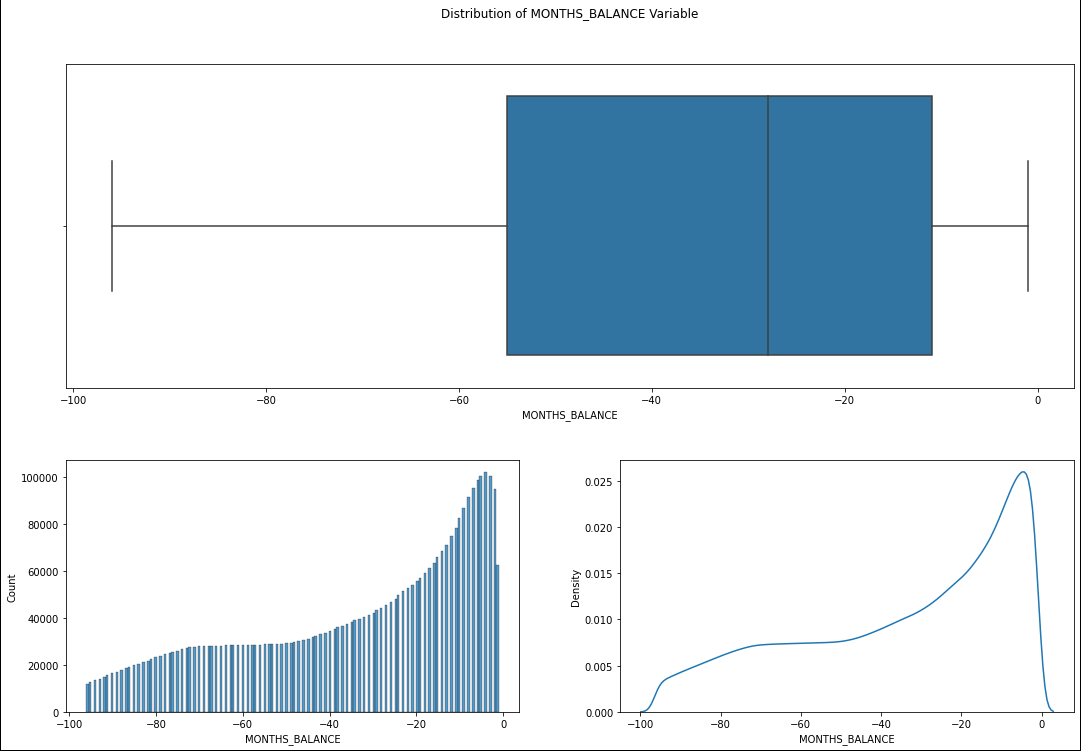

In [17]:
plotter.numeric_distribution(
    title = "Distribution of MONTHS_BALANCE Variable",
    data = cc_balance,
    num_col = "MONTHS_BALANCE"
)

In [18]:
tab.desc_num_var(cc_balance["MONTHS_BALANCE"])

		DESCRIPTION OF THE COLUMN
Minimum                  -96.000000
Q1 (25%)                 -55.000000
Q2 (50%)                 -28.000000
Q3 (75%)                 -11.000000
Maximum                   -1.000000
Mean                     -34.521921
Median                   -28.000000
Mode                      -4.000000
Skewness                  -0.598040
Kurtosis                  -0.856152
IQR Magnitude             44.000000
Lower Limit of Whisker   -96.000000
Upper Limit of Whisker    -1.000000
Number of Outliers         0.000000
Percentage of Outliers     0.000000
dtype: float64


<h4><div id="3.3.4">3.3.4 : Analyzing AMT_BALANCE Variable</div></h4>

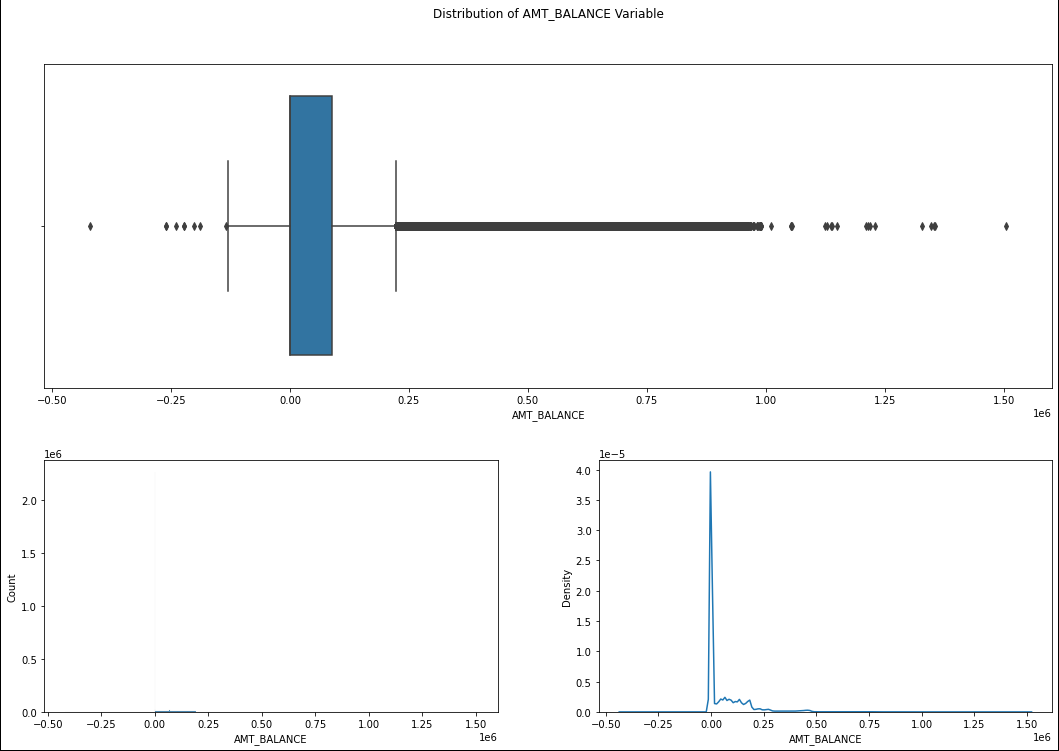

In [19]:
plotter.numeric_distribution(
    title = "Distribution of AMT_BALANCE Variable",
    data = cc_balance,
    num_col = "AMT_BALANCE"
)

In [20]:
tab.desc_num_var(cc_balance["AMT_BALANCE"])

		DESCRIPTION OF THE COLUMN
Minimum                  -4.202502e+05
Q1 (25%)                  0.000000e+00
Q2 (50%)                  0.000000e+00
Q3 (75%)                  8.904669e+04
Maximum                   1.505902e+06
Mean                      5.830016e+04
Median                    0.000000e+00
Mode                      0.000000e+00
Skewness                  2.920173e+00
Kurtosis                  1.177868e+01
IQR Magnitude             8.904669e+04
Lower Limit of Whisker   -1.335700e+05
Upper Limit of Whisker    2.226167e+05
Number of Outliers        2.481460e+05
Percentage of Outliers    6.461610e+00
dtype: float64


<h4><div id="3.3.5">3.3.5 : Analyzing AMT_CREDIT_LIMIT_ACTUAL Variable</div></h4>

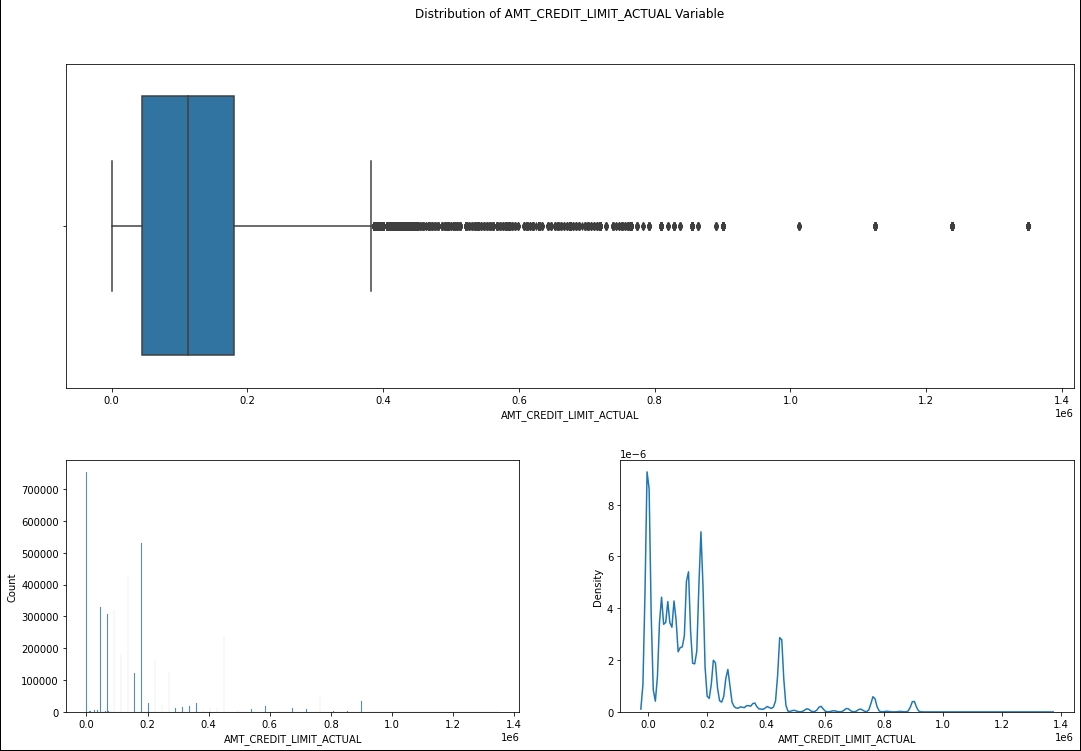

In [21]:
plotter.numeric_distribution(
    title = "Distribution of AMT_CREDIT_LIMIT_ACTUAL Variable",
    data = cc_balance,
    num_col = "AMT_CREDIT_LIMIT_ACTUAL"
)

In [22]:
tab.desc_num_var(cc_balance["AMT_CREDIT_LIMIT_ACTUAL"])

		DESCRIPTION OF THE COLUMN
Minimum                   0.000000e+00
Q1 (25%)                  4.500000e+04
Q2 (50%)                  1.125000e+05
Q3 (75%)                  1.800000e+05
Maximum                   1.350000e+06
Mean                      1.538080e+05
Median                    1.125000e+05
Mode                      0.000000e+00
Skewness                  2.059732e+00
Kurtosis                  5.184047e+00
IQR Magnitude             1.350000e+05
Lower Limit of Whisker    0.000000e+00
Upper Limit of Whisker    3.825000e+05
Number of Outliers        4.049270e+05
Percentage of Outliers    1.054412e+01
dtype: float64


<h4><div id="3.3.6">3.3.6 : Analyzing AMT_DRAWINGS_ATM_CURRENT Variable</div></h4>

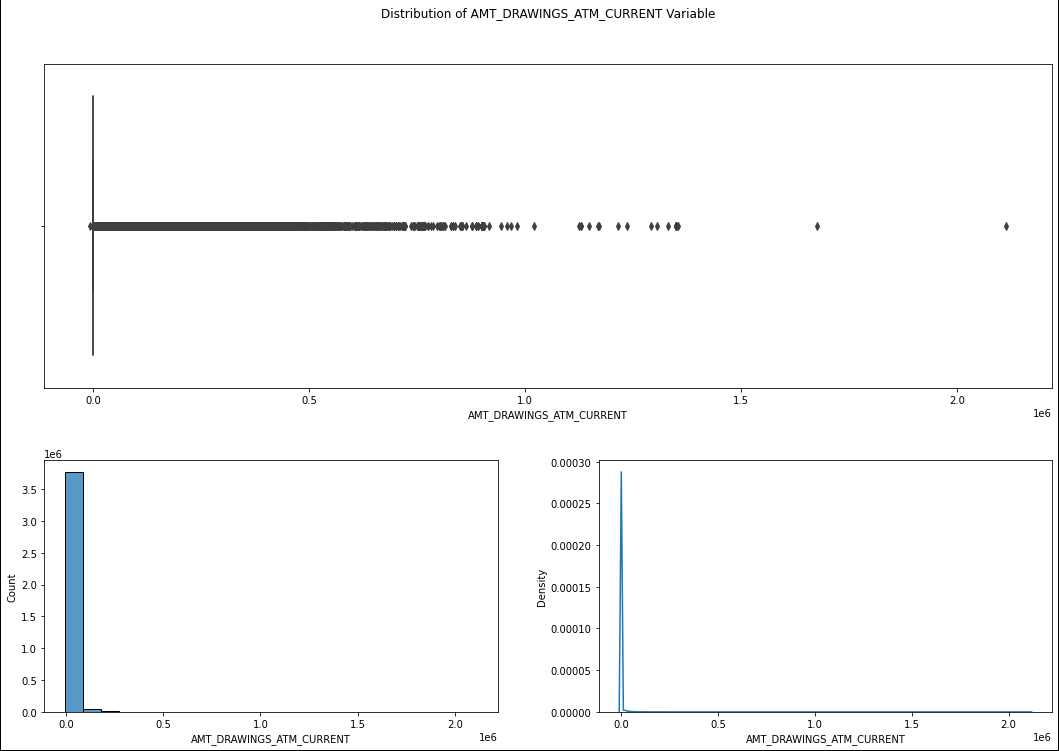

In [23]:
plotter.numeric_distribution(
    title = "Distribution of AMT_DRAWINGS_ATM_CURRENT Variable",
    data = cc_balance,
    num_col = "AMT_DRAWINGS_ATM_CURRENT"
)

In [24]:
tab.desc_num_var(cc_balance["AMT_DRAWINGS_ATM_CURRENT"])

		DESCRIPTION OF THE COLUMN
Minimum                  -6.827310e+03
Q1 (25%)                  0.000000e+00
Q2 (50%)                  0.000000e+00
Q3 (75%)                  0.000000e+00
Maximum                   2.115000e+06
Mean                      4.797384e+03
Median                    0.000000e+00
Mode                      0.000000e+00
Skewness                  1.076933e+01
Kurtosis                  2.040418e+02
IQR Magnitude             0.000000e+00
Lower Limit of Whisker    0.000000e+00
Upper Limit of Whisker    0.000000e+00
Number of Outliers        4.247780e+05
Percentage of Outliers    1.106103e+01
dtype: float64


<h4><div id=3.3.7>3.3.7 : Analyzing AMT_DRAWINGS_CURRENT Variable</div></h4>

<h5><div id=3.3.7.1>3.3.7.1 : Checking Data Integrity</div></h5>

Theoretically, the column AMT_DRAWINGS_CURRENT is a combination of AMT_DRAWINGS_ATM_CURRENT, AMT_DRAWINGS_POS_CURRENT and AMT_DRAWINGS_OTHER_CURRENT. WE need to check if this relationship is follwed by the data as well.

In [25]:
(cc_balance["AMT_DRAWINGS_CURRENT"] == (
    cc_balance["AMT_DRAWINGS_ATM_CURRENT"] + 
    cc_balance["AMT_DRAWINGS_OTHER_CURRENT"] + 
    cc_balance["AMT_DRAWINGS_POS_CURRENT"]
)).value_counts()

True     3828019
False      12293
Name: count, dtype: int64

The relationship is reflected in the data to a good extent, as expressed by 38,28,019 records. But 12,293 records don't seem to follow this. In order to make the data consistent, we re-assign the column by summing up its constituents.

In [26]:
# Re-assigning the values:

cc_balance["AMT_DRAWINGS_CURRENT"] = (
    cc_balance["AMT_DRAWINGS_ATM_CURRENT"] + 
    cc_balance["AMT_DRAWINGS_OTHER_CURRENT"] + 
    cc_balance["AMT_DRAWINGS_POS_CURRENT"]
)

<h5><div id=3.3.7.2>3.3.7.2 : Describing the Variable</div></h5>

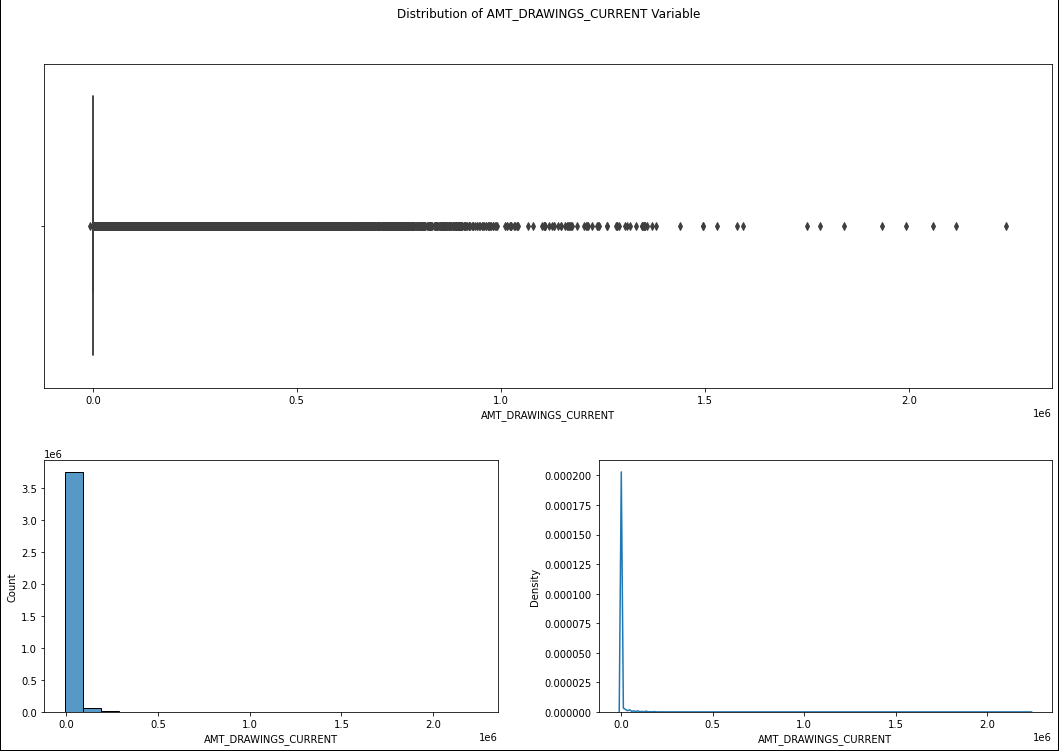

In [27]:
plotter.numeric_distribution(
    title = "Distribution of AMT_DRAWINGS_CURRENT Variable",
    data = cc_balance,
    num_col = "AMT_DRAWINGS_CURRENT"
)

In [28]:
tab.desc_num_var(cc_balance["AMT_DRAWINGS_CURRENT"])

		DESCRIPTION OF THE COLUMN
Minimum                  -6.827310e+03
Q1 (25%)                  0.000000e+00
Q2 (50%)                  0.000000e+00
Q3 (75%)                  0.000000e+00
Maximum                   2.239274e+06
Mean                      7.418438e+03
Median                    0.000000e+00
Mode                      0.000000e+00
Skewness                  9.958746e+00
Kurtosis                  1.773528e+02
IQR Magnitude             0.000000e+00
Lower Limit of Whisker    0.000000e+00
Upper Limit of Whisker    0.000000e+00
Number of Outliers        6.098870e+05
Percentage of Outliers    1.588118e+01
dtype: float64


<h4><div id=3.3.8>3.3.8 : Analyzing AMT_DRAWINGS_OTHER_CURRENT Variable</div></h4>

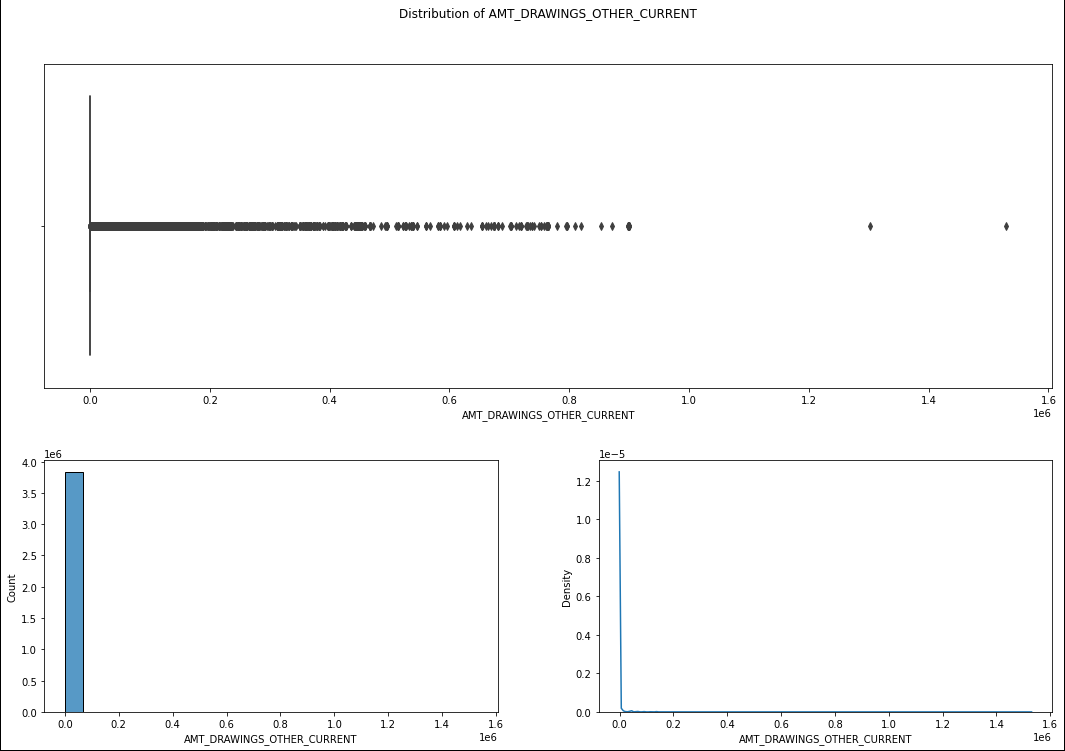

In [29]:
plotter.numeric_distribution(
    title = "Distribution of AMT_DRAWINGS_OTHER_CURRENT",
    data = cc_balance,
    num_col = "AMT_DRAWINGS_OTHER_CURRENT"
)

In [30]:
tab.desc_num_var(cc_balance["AMT_DRAWINGS_OTHER_CURRENT"])

		DESCRIPTION OF THE COLUMN
Minimum                   0.000000e+00
Q1 (25%)                  0.000000e+00
Q2 (50%)                  0.000000e+00
Q3 (75%)                  0.000000e+00
Maximum                   1.529847e+06
Mean                      2.319048e+02
Median                    0.000000e+00
Mode                      0.000000e+00
Skewness                  5.637477e+01
Kurtosis                  4.508514e+03
IQR Magnitude             0.000000e+00
Lower Limit of Whisker    0.000000e+00
Upper Limit of Whisker    0.000000e+00
Number of Outliers        1.233300e+04
Percentage of Outliers    3.211458e-01
dtype: float64


<h4><div id=3.3.9>3.3.9 : Analyzing AMT_DRAWINGS_POS_CURRENT Variable</div></h4>

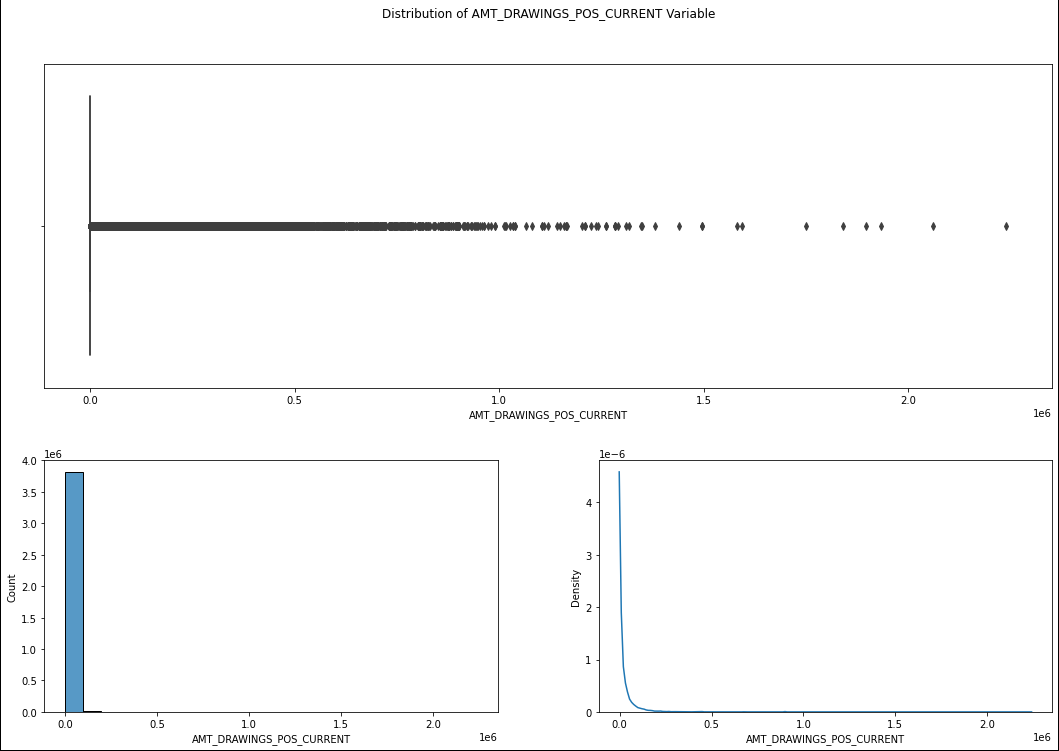

In [31]:
plotter.numeric_distribution(
    title = "Distribution of AMT_DRAWINGS_POS_CURRENT Variable",
    data = cc_balance,
    num_col = "AMT_DRAWINGS_POS_CURRENT"
)

In [32]:
tab.desc_num_var(cc_balance["AMT_DRAWINGS_POS_CURRENT"])

		DESCRIPTION OF THE COLUMN
Minimum                   0.000000e+00
Q1 (25%)                  0.000000e+00
Q2 (50%)                  0.000000e+00
Q3 (75%)                  0.000000e+00
Maximum                   2.239274e+06
Mean                      2.389150e+03
Median                    0.000000e+00
Mode                      0.000000e+00
Skewness                  2.161294e+01
Kurtosis                  8.835712e+02
IQR Magnitude             0.000000e+00
Lower Limit of Whisker    0.000000e+00
Upper Limit of Whisker    0.000000e+00
Number of Outliers        2.649010e+05
Percentage of Outliers    6.897903e+00
dtype: float64


<h4><div id=3.3.10>3.3.10 : Analyzing AMT_INST_MIN_REGULARITY Variable</div></h4>

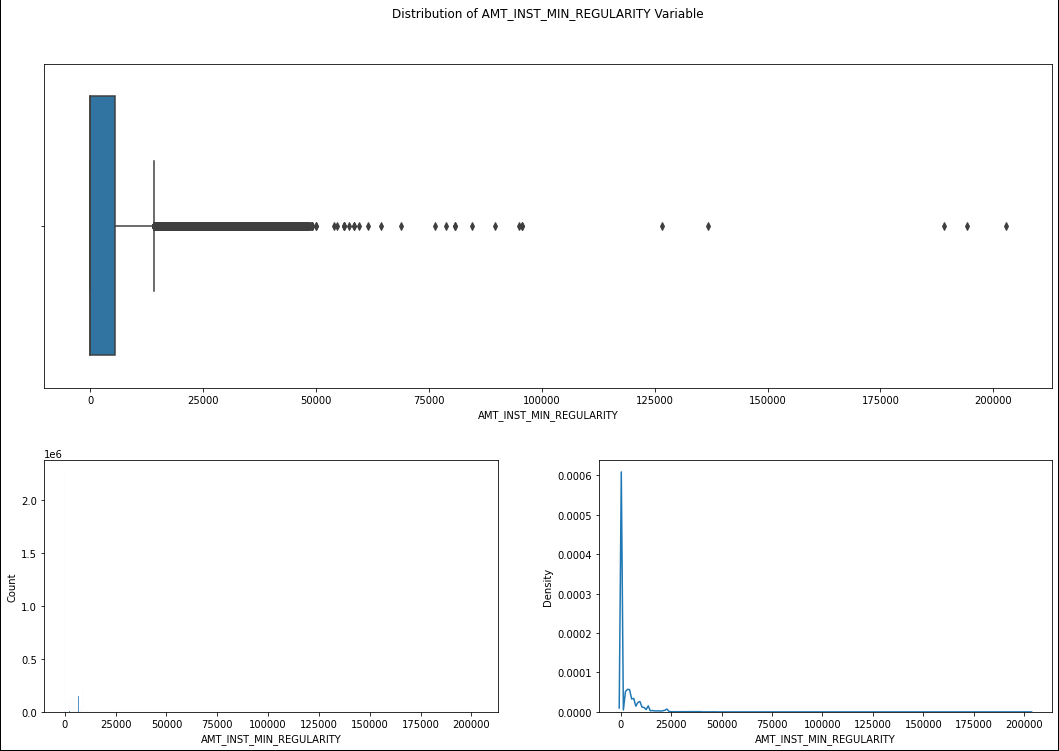

In [33]:
plotter.numeric_distribution(
    title = "Distribution of AMT_INST_MIN_REGULARITY Variable",
    data = cc_balance,
    num_col = "AMT_INST_MIN_REGULARITY"
)

In [34]:
tab.desc_num_var(cc_balance["AMT_INST_MIN_REGULARITY"])

		DESCRIPTION OF THE COLUMN
Minimum                        0.000000
Q1 (25%)                       0.000000
Q2 (50%)                       0.000000
Q3 (75%)                    5625.000000
Maximum                   202882.005000
Mean                        3258.821327
Median                         0.000000
Mode                           0.000000
Skewness                       2.613878
Kurtosis                      10.989798
IQR Magnitude               5625.000000
Lower Limit of Whisker         0.000000
Upper Limit of Whisker     14062.500000
Number of Outliers        155560.000000
Percentage of Outliers         4.050713
dtype: float64


<h4><div id=3.3.11>3.3.11 : Analyzing AMT_PAYMENT_CURRENT Variable</div></h4>

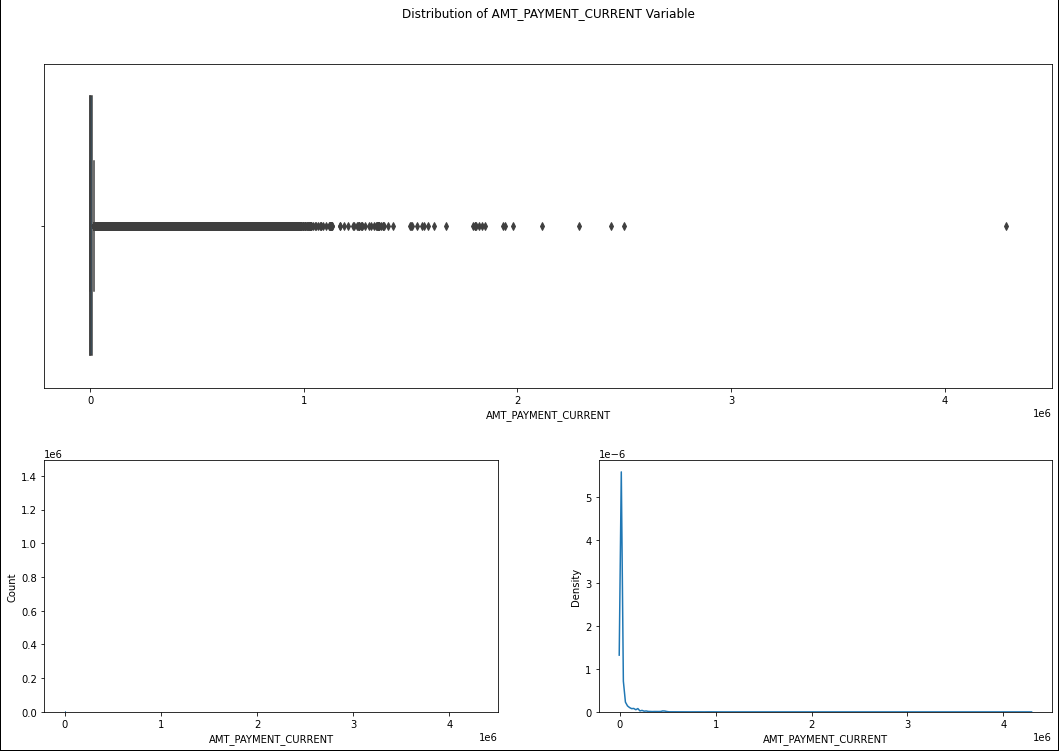

In [35]:
plotter.numeric_distribution(
    title = "Distribution of AMT_PAYMENT_CURRENT Variable",
    data = cc_balance,
    num_col = "AMT_PAYMENT_CURRENT"
)

In [36]:
tab.desc_num_var(cc_balance["AMT_PAYMENT_CURRENT"])

		DESCRIPTION OF THE COLUMN
Minimum                   0.000000e+00
Q1 (25%)                  0.000000e+00
Q2 (50%)                  4.099050e+02
Q3 (75%)                  7.875000e+03
Maximum                   4.289207e+06
Mean                      8.224629e+03
Median                    4.099050e+02
Mode                      0.000000e+00
Skewness                  1.436056e+01
Kurtosis                  3.864135e+02
IQR Magnitude             7.875000e+03
Lower Limit of Whisker    0.000000e+00
Upper Limit of Whisker    1.968750e+04
Number of Outliers        3.020370e+05
Percentage of Outliers    7.864908e+00
dtype: float64


<h4><div id=3.3.12>3.3.12 : Analyzing AMT_PAYMENT_TOTAL_CURRENT Variable</div></h4>

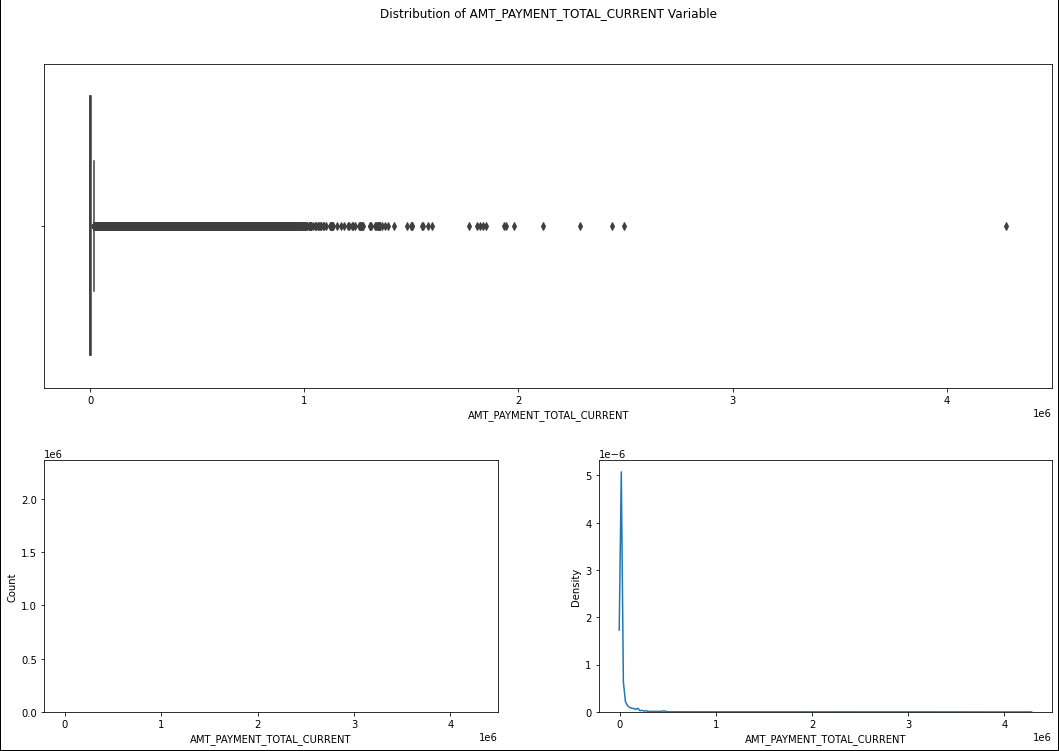

In [37]:
plotter.numeric_distribution(
    title = "Distribution of AMT_PAYMENT_TOTAL_CURRENT Variable",
    data = cc_balance,
    num_col = "AMT_PAYMENT_TOTAL_CURRENT"
)

In [38]:
tab.desc_num_var(cc_balance["AMT_PAYMENT_TOTAL_CURRENT"])

		DESCRIPTION OF THE COLUMN
Minimum                   0.000000e+00
Q1 (25%)                  0.000000e+00
Q2 (50%)                  0.000000e+00
Q3 (75%)                  6.750000e+03
Maximum                   4.278316e+06
Mean                      7.588857e+03
Median                    0.000000e+00
Mode                      0.000000e+00
Skewness                  1.447972e+01
Kurtosis                  3.932558e+02
IQR Magnitude             6.750000e+03
Lower Limit of Whisker    0.000000e+00
Upper Limit of Whisker    1.687500e+04
Number of Outliers        3.247420e+05
Percentage of Outliers    8.456136e+00
dtype: float64


<h4><div id=3.3.13>3.3.13 : Analyzing AMT_RECEIVABLE_PRINCIPAL Variable</div></h4>

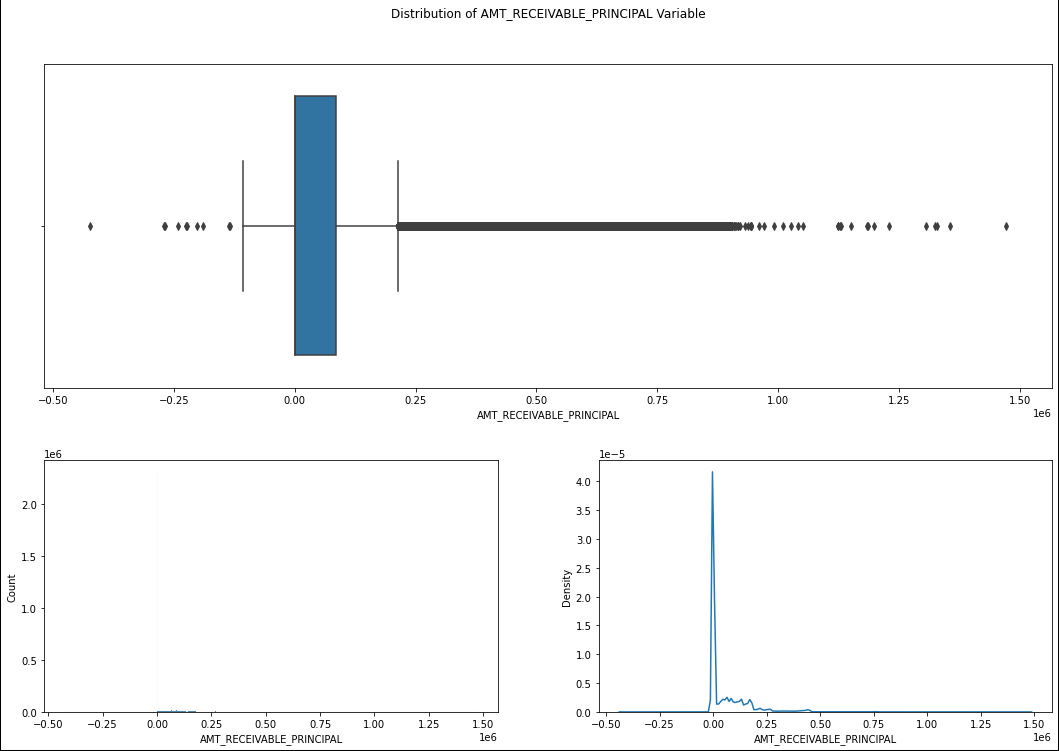

In [39]:
plotter.numeric_distribution(
    title = "Distribution of AMT_RECEIVABLE_PRINCIPAL Variable",
    data = cc_balance,
    num_col = "AMT_RECEIVABLE_PRINCIPAL"
)

In [40]:
tab.desc_num_var(cc_balance["AMT_RECEIVABLE_PRINCIPAL"])

		DESCRIPTION OF THE COLUMN
Minimum                  -4.233058e+05
Q1 (25%)                  0.000000e+00
Q2 (50%)                  0.000000e+00
Q3 (75%)                  8.535924e+04
Maximum                   1.472317e+06
Mean                      5.596588e+04
Median                    0.000000e+00
Mode                      0.000000e+00
Skewness                  2.942316e+00
Kurtosis                  1.195846e+01
IQR Magnitude             8.535924e+04
Lower Limit of Whisker   -1.280389e+05
Upper Limit of Whisker    2.133981e+05
Number of Outliers        2.505290e+05
Percentage of Outliers    6.523663e+00
dtype: float64


<h4><div id=3.3.14>3.3.14 : Analyzing AMT_RECIVABLE Variable</div></h4>

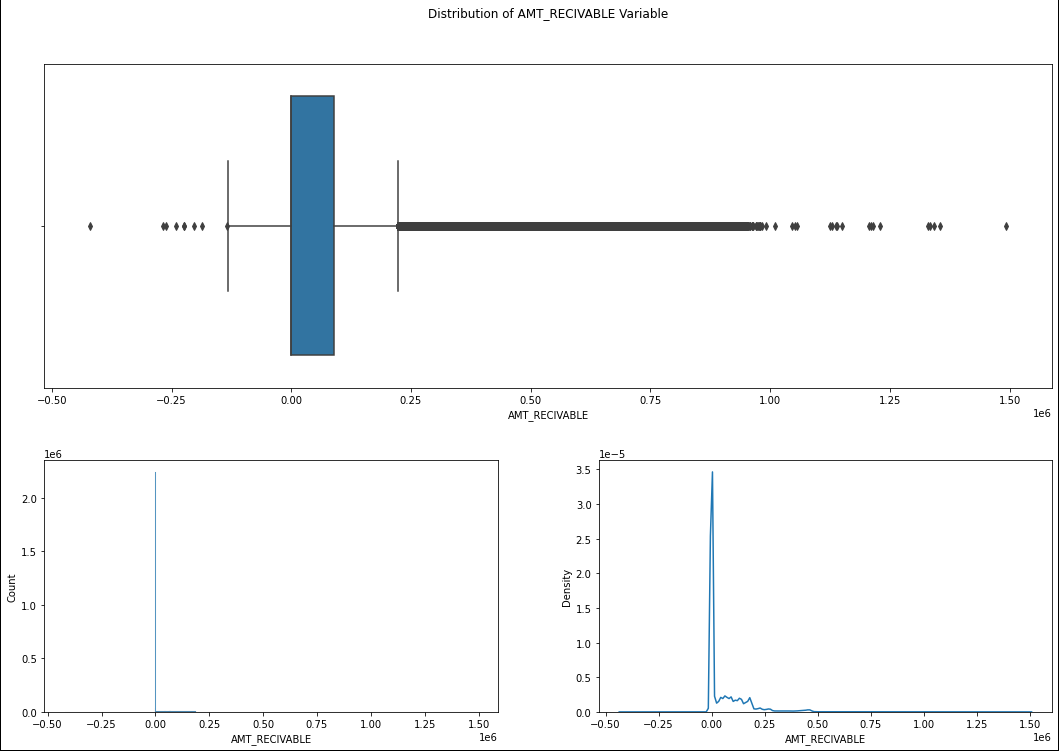

In [41]:
plotter.numeric_distribution(
    title = "Distribution of AMT_RECIVABLE Variable",
    data = cc_balance,
    num_col = "AMT_RECIVABLE"
)

In [42]:
tab.desc_num_var(cc_balance["AMT_RECIVABLE"])

		DESCRIPTION OF THE COLUMN
Minimum                  -4.202502e+05
Q1 (25%)                  0.000000e+00
Q2 (50%)                  0.000000e+00
Q3 (75%)                  8.889949e+04
Maximum                   1.493338e+06
Mean                      5.808881e+04
Median                    0.000000e+00
Mode                      0.000000e+00
Skewness                  2.913172e+00
Kurtosis                  1.171959e+01
IQR Magnitude             8.889949e+04
Lower Limit of Whisker   -1.333492e+05
Upper Limit of Whisker    2.222487e+05
Number of Outliers        2.475100e+05
Percentage of Outliers    6.445049e+00
dtype: float64


<h4><div id=3.3.15>3.3.15 : Analyzing AMT_TOTAL_RECEIVABLE Variable</div></h4>

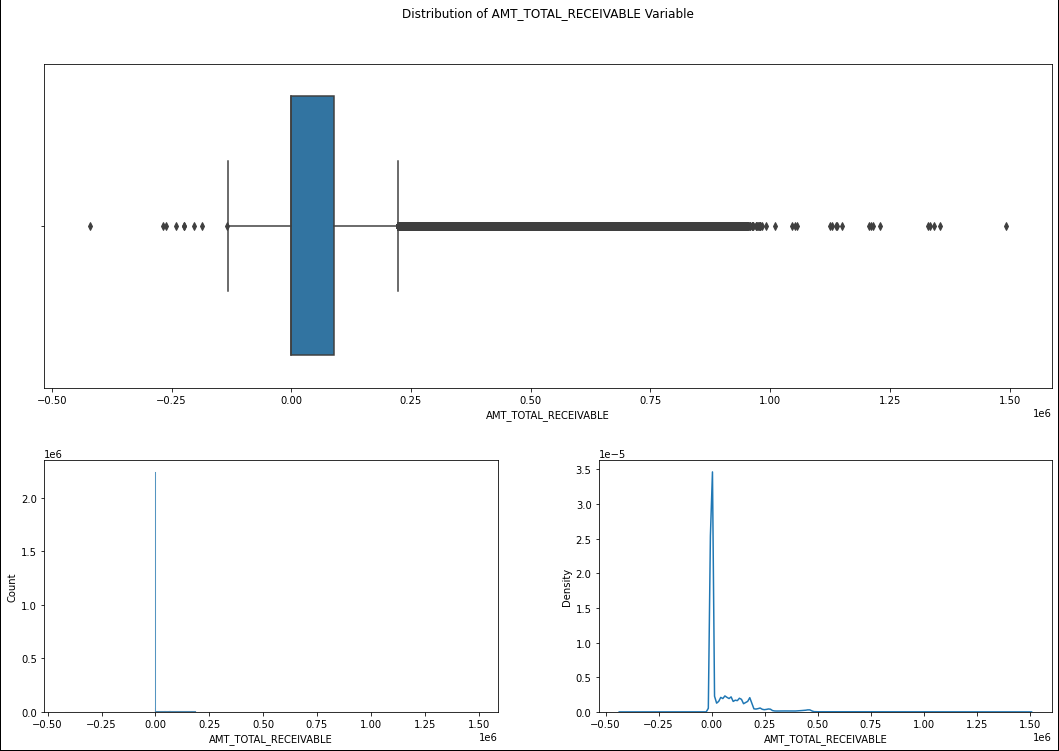

In [43]:
plotter.numeric_distribution(
    title = "Distribution of AMT_TOTAL_RECEIVABLE Variable",
    data = cc_balance,
    num_col = "AMT_TOTAL_RECEIVABLE"
)

In [44]:
tab.desc_num_var(cc_balance["AMT_TOTAL_RECEIVABLE"])

		DESCRIPTION OF THE COLUMN
Minimum                  -4.202502e+05
Q1 (25%)                  0.000000e+00
Q2 (50%)                  0.000000e+00
Q3 (75%)                  8.891451e+04
Maximum                   1.493338e+06
Mean                      5.809829e+04
Median                    0.000000e+00
Mode                      0.000000e+00
Skewness                  2.912684e+00
Kurtosis                  1.171592e+01
IQR Magnitude             8.891451e+04
Lower Limit of Whisker   -1.333718e+05
Upper Limit of Whisker    2.222863e+05
Number of Outliers        2.474730e+05
Percentage of Outliers    6.444086e+00
dtype: float64


<h4><div id=3.3.16>3.3.16 : Analyzing CNT_DRAWINGS_ATM_CURRENT Variable</div></h4>

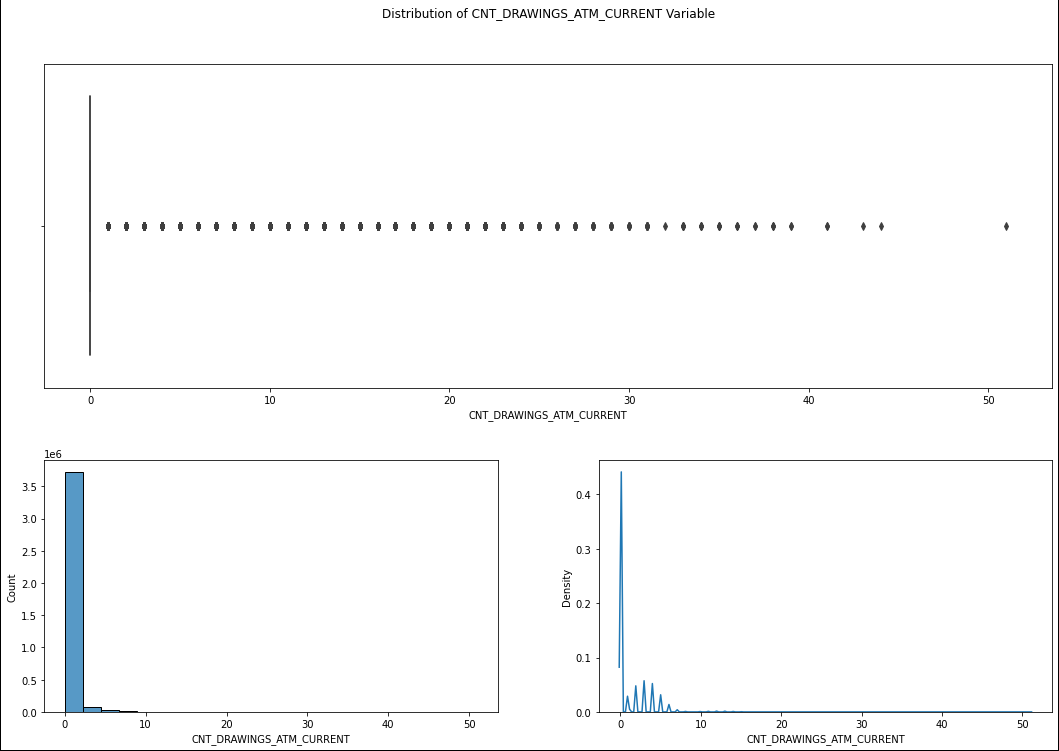

In [45]:
plotter.numeric_distribution(
    title = "Distribution of CNT_DRAWINGS_ATM_CURRENT Variable",
    data = cc_balance,
    num_col = "CNT_DRAWINGS_ATM_CURRENT"
)

In [46]:
tab.desc_num_var(cc_balance["CNT_DRAWINGS_ATM_CURRENT"])

		DESCRIPTION OF THE COLUMN
Minimum                        0.000000
Q1 (25%)                       0.000000
Q2 (50%)                       0.000000
Q3 (75%)                       0.000000
Maximum                       51.000000
Mean                           0.249030
Median                         0.000000
Mode                           0.000000
Skewness                       7.700673
Kurtosis                     100.742489
IQR Magnitude                  0.000000
Lower Limit of Whisker         0.000000
Upper Limit of Whisker         0.000000
Number of Outliers        424778.000000
Percentage of Outliers        11.061028
dtype: float64


<h4><div id=3.3.17>3.3.17 : Analyzing CNT_DRAWINGS_CURRENT Variable</div></h4>

<h5><div id=3.3.17.1>3.3.17.1 : Checking Data Integrity</div></h5>

Theoretically, the column CNT_DRAWINGS_CURRENT is a combination of CNT_DRAWINGS_ATM_CURRENT, CNT_DRAWINGS_POS_CURRENT and CNT_DRAWINGS_OTHER_CURRENT. WE need to check if this relationship is follwed by the data as well.

In [47]:
(cc_balance["CNT_DRAWINGS_CURRENT"] == (
    cc_balance["CNT_DRAWINGS_ATM_CURRENT"] + 
    cc_balance["CNT_DRAWINGS_OTHER_CURRENT"] + 
    cc_balance["CNT_DRAWINGS_POS_CURRENT"]
)).value_counts()

True    3840312
Name: count, dtype: int64

The relationship is *perfectly* captured by the data because the sum of all the constituent columns of CNT_DRAWINGS_CURRENT (i.e. CNT_DRAWINGS_ATM_CURRENT, CNT_DRAWINGS_POS_CURRENT and CNT_DRAWINGS_OTHER_CURRENT) is equal to the the column itself. Therefore, no re-assignment is required in this case.

<h5><div id=3.3.17.2>3.3.17.2 : Describing the Variable</div></h5>

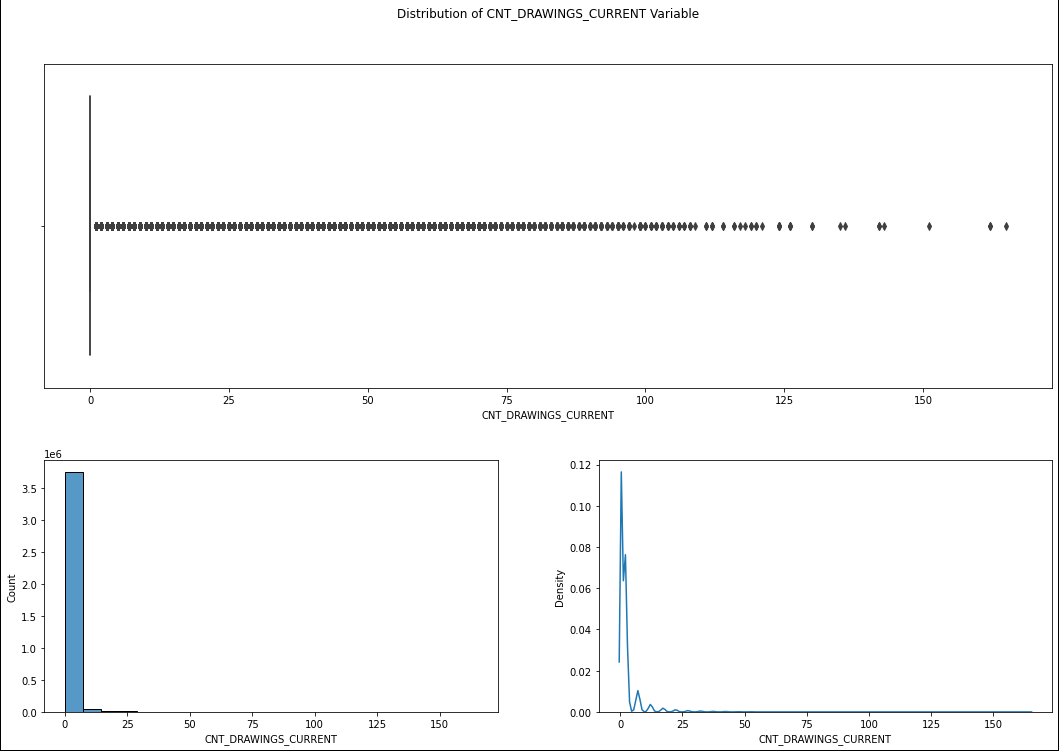

In [48]:
plotter.numeric_distribution(
    title = "Distribution of CNT_DRAWINGS_CURRENT Variable",
    data = cc_balance,
    num_col = "CNT_DRAWINGS_CURRENT"
)

In [49]:
tab.desc_num_var(cc_balance["CNT_DRAWINGS_CURRENT"])

		DESCRIPTION OF THE COLUMN
Minimum                        0.000000
Q1 (25%)                       0.000000
Q2 (50%)                       0.000000
Q3 (75%)                       0.000000
Maximum                      165.000000
Mean                           0.703144
Median                         0.000000
Mode                           0.000000
Skewness                      10.635288
Kurtosis                     177.928314
IQR Magnitude                  0.000000
Lower Limit of Whisker         0.000000
Upper Limit of Whisker         0.000000
Number of Outliers        610360.000000
Percentage of Outliers        15.893500
dtype: float64


<h4><div id=3.3.18>3.3.18 : Analyzing CNT_DRAWINGS_OTHER_CURRENT Variable</div></h4>

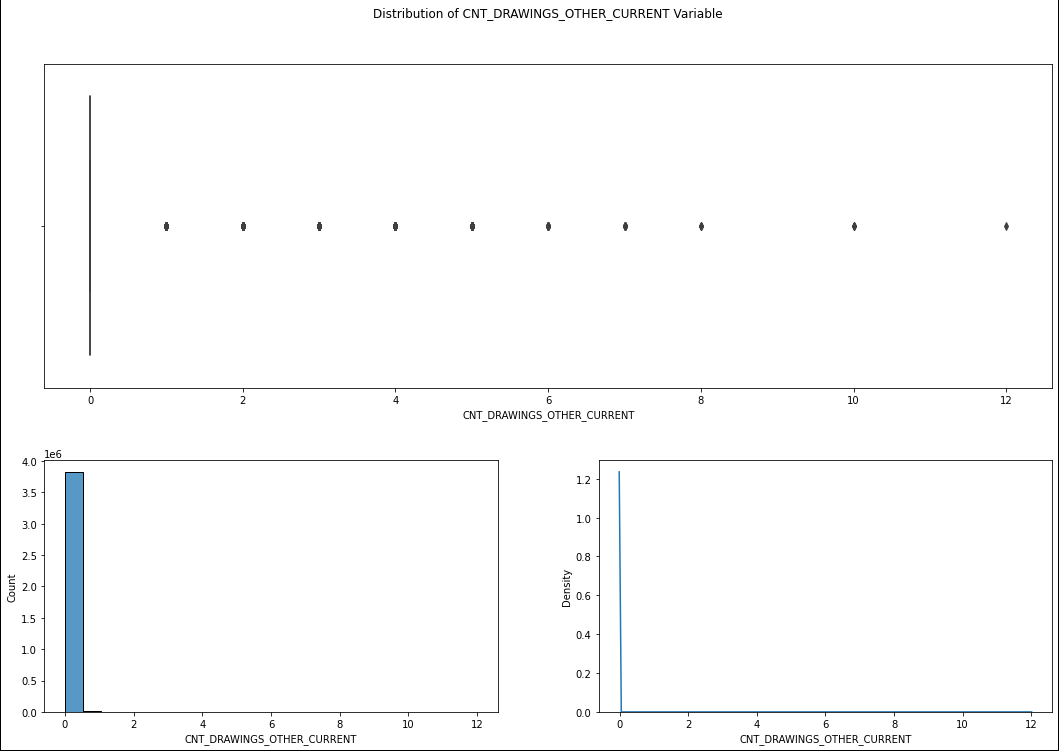

In [50]:
plotter.numeric_distribution(
    title = "Distribution of CNT_DRAWINGS_OTHER_CURRENT Variable",
    data = cc_balance,
    num_col = "CNT_DRAWINGS_OTHER_CURRENT"
)

In [51]:
tab.desc_num_var(cc_balance["CNT_DRAWINGS_OTHER_CURRENT"])

		DESCRIPTION OF THE COLUMN
Minimum                       0.000000
Q1 (25%)                      0.000000
Q2 (50%)                      0.000000
Q3 (75%)                      0.000000
Maximum                      12.000000
Mean                          0.003873
Median                        0.000000
Mode                          0.000000
Skewness                     29.352751
Kurtosis                   1557.470160
IQR Magnitude                 0.000000
Lower Limit of Whisker        0.000000
Upper Limit of Whisker        0.000000
Number of Outliers        12808.000000
Percentage of Outliers        0.333515
dtype: float64


<h4><div id=3.3.19>3.3.19 : Analyzing CNT_DRAWINGS_POS_CURRENT Variable</div></h4>

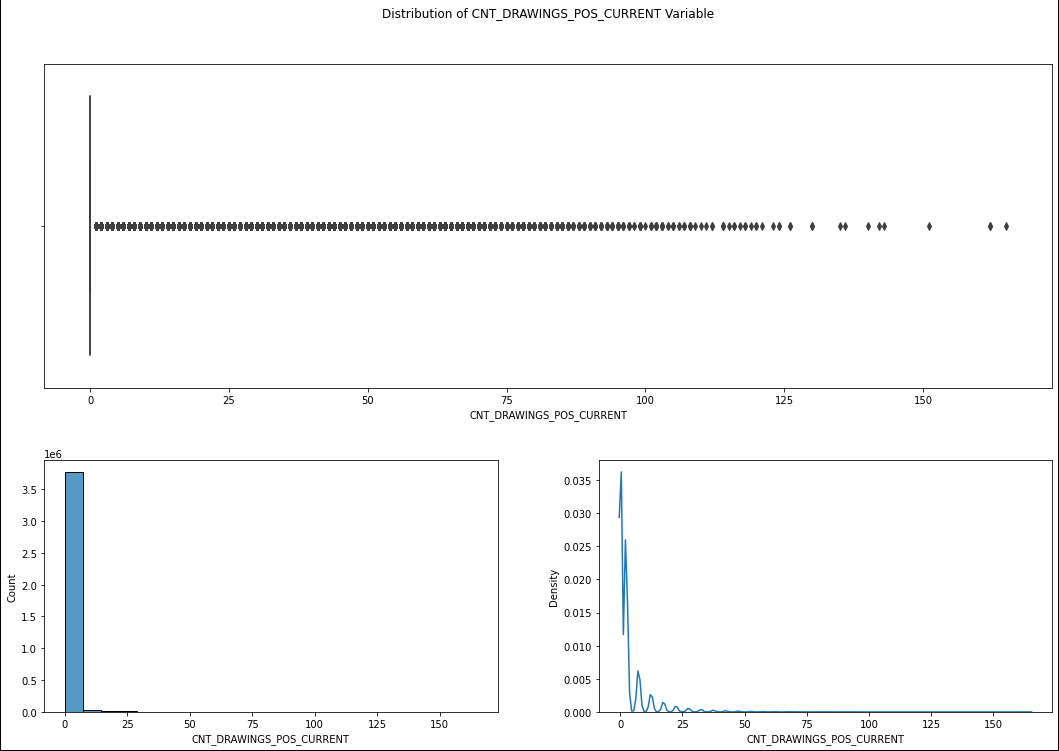

In [52]:
plotter.numeric_distribution(
    title = "Distribution of CNT_DRAWINGS_POS_CURRENT Variable",
    data = cc_balance,
    num_col = "CNT_DRAWINGS_POS_CURRENT"
)

In [53]:
tab.desc_num_var(cc_balance["CNT_DRAWINGS_POS_CURRENT"])

		DESCRIPTION OF THE COLUMN
Minimum                        0.000000
Q1 (25%)                       0.000000
Q2 (50%)                       0.000000
Q3 (75%)                       0.000000
Maximum                      165.000000
Mean                           0.450242
Median                         0.000000
Mode                           0.000000
Skewness                      12.656486
Kurtosis                     239.080402
IQR Magnitude                  0.000000
Lower Limit of Whisker         0.000000
Upper Limit of Whisker         0.000000
Number of Outliers        264902.000000
Percentage of Outliers         6.897929
dtype: float64


<h4><div id=3.3.20>3.3.20 : Analyzing CNT_INSTALMENT_MATURE_CUM Variable</div></h4>

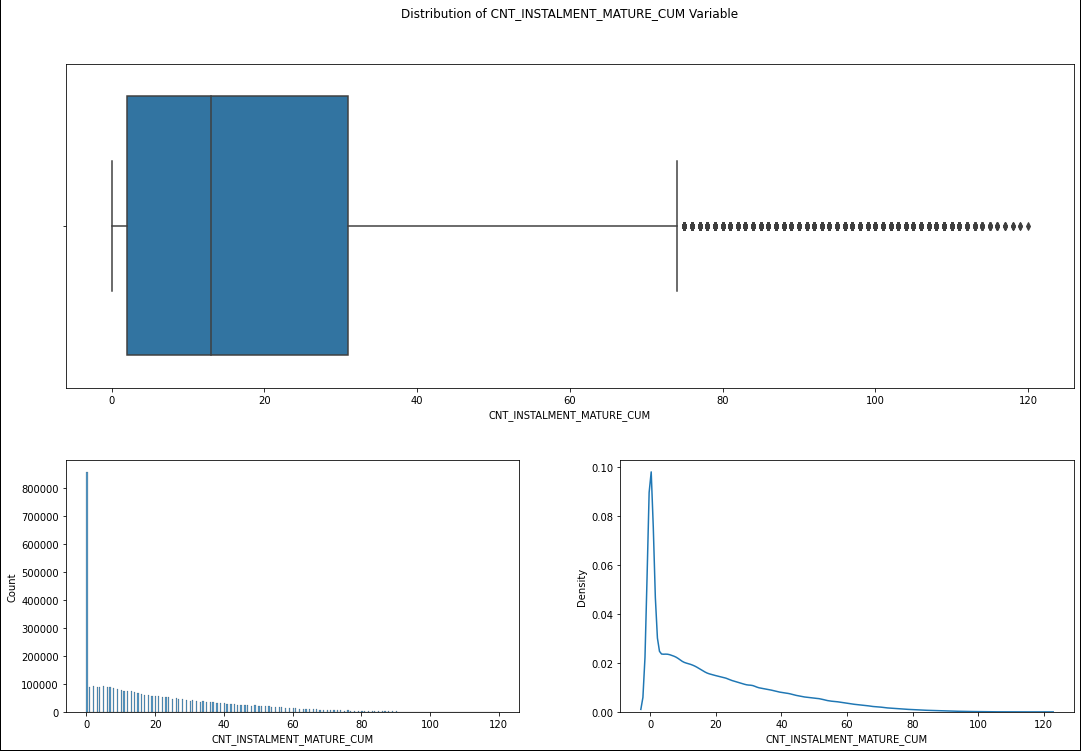

In [54]:
plotter.numeric_distribution(
    title = "Distribution of CNT_INSTALMENT_MATURE_CUM Variable",
    data = cc_balance,
    num_col = "CNT_INSTALMENT_MATURE_CUM"
)

In [55]:
tab.desc_num_var(cc_balance["CNT_INSTALMENT_MATURE_CUM"])

		DESCRIPTION OF THE COLUMN
Minimum                       0.000000
Q1 (25%)                      2.000000
Q2 (50%)                     13.000000
Q3 (75%)                     31.000000
Maximum                     120.000000
Mean                         19.169863
Median                       13.000000
Mode                          0.000000
Skewness                      1.150097
Kurtosis                      0.786252
IQR Magnitude                29.000000
Lower Limit of Whisker        0.000000
Upper Limit of Whisker       74.500000
Number of Outliers        58845.000000
Percentage of Outliers        1.532297
dtype: float64


<h4><div id=3.3.21>3.3.21 : Analyzing NAME_CONTRACT_STATUS Variable</div></h4>

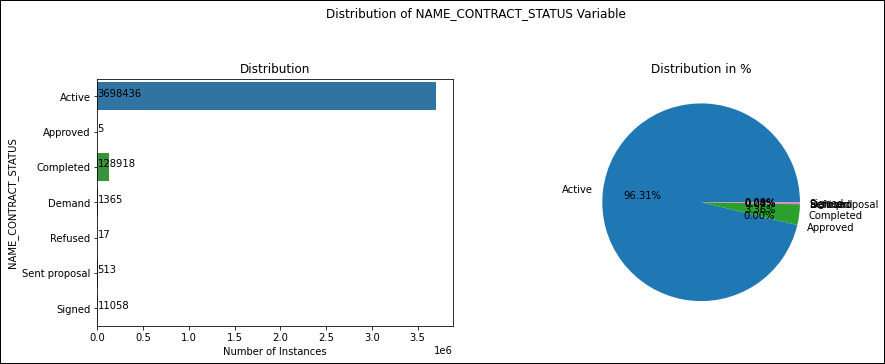

In [56]:
plotter.categorical_distribution(
    title = "Distribution of NAME_CONTRACT_STATUS Variable",
    series = cc_balance["NAME_CONTRACT_STATUS"],
)

In [57]:
tab.desc_cat_var(cc_balance["NAME_CONTRACT_STATUS"])

		DISTRIBUTION OF THE COLUMN
      Categories  Number of Values  Percentage of Values
0         Active           3698436             96.305613
1      Completed            128918              3.356967
2         Signed             11058              0.287945
3         Demand              1365              0.035544
4  Sent proposal               513              0.013358
5        Refused                17              0.000443
6       Approved                 5              0.000130

Number of Categories	:  7

Most Frequent Category:
  Categories  Number of Values  Percentage of Values
0     Active           3698436             96.305613

Least Frequent Category:
  Categories  Number of Values  Percentage of Values
6   Approved                 5               0.00013


<h4><div id=3.3.22>3.3.22 : Analyzing SK_DPD Variable</div></h4>

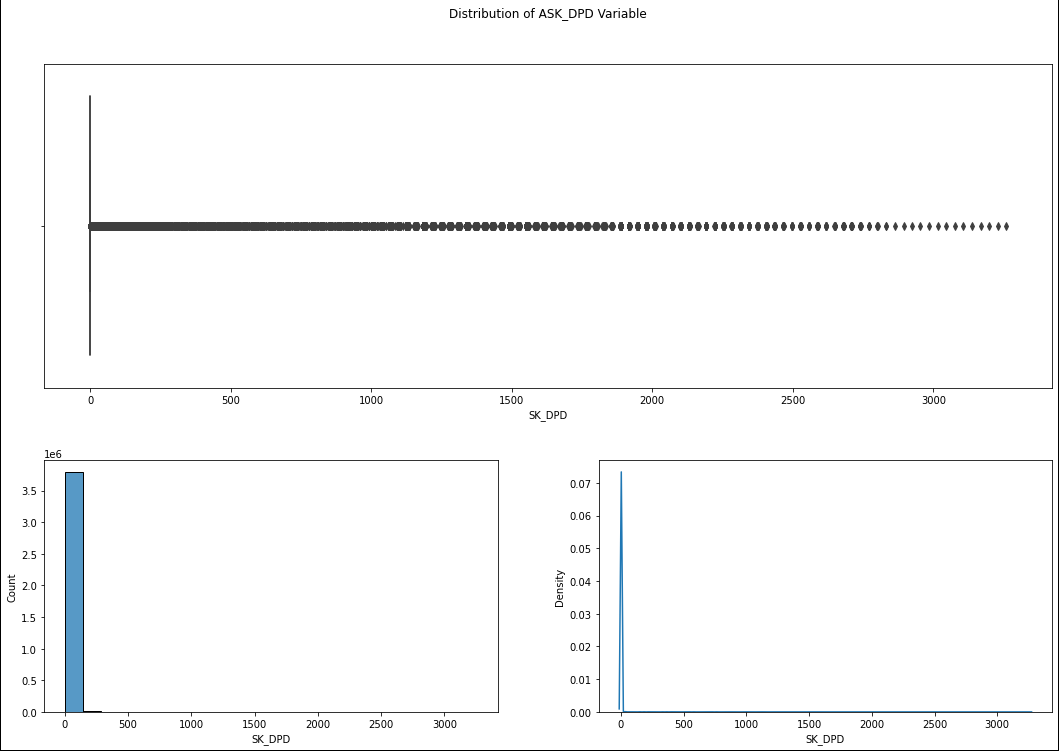

In [58]:
plotter.numeric_distribution(
    title = "Distribution of ASK_DPD Variable",
    data = cc_balance,
    num_col = "SK_DPD"
)

In [59]:
tab.desc_num_var(cc_balance["SK_DPD"])

		DESCRIPTION OF THE COLUMN
Minimum                        0.000000
Q1 (25%)                       0.000000
Q2 (50%)                       0.000000
Q3 (75%)                       0.000000
Maximum                     3260.000000
Mean                           9.283667
Median                         0.000000
Mode                           0.000000
Skewness                      12.946990
Kurtosis                     190.372636
IQR Magnitude                  0.000000
Lower Limit of Whisker         0.000000
Upper Limit of Whisker         0.000000
Number of Outliers        153355.000000
Percentage of Outliers         3.993295
dtype: float64


<h4><div id="3.3.23">3.3.23 : Analyzing SK_DPD_DEF Variable</div></h4>

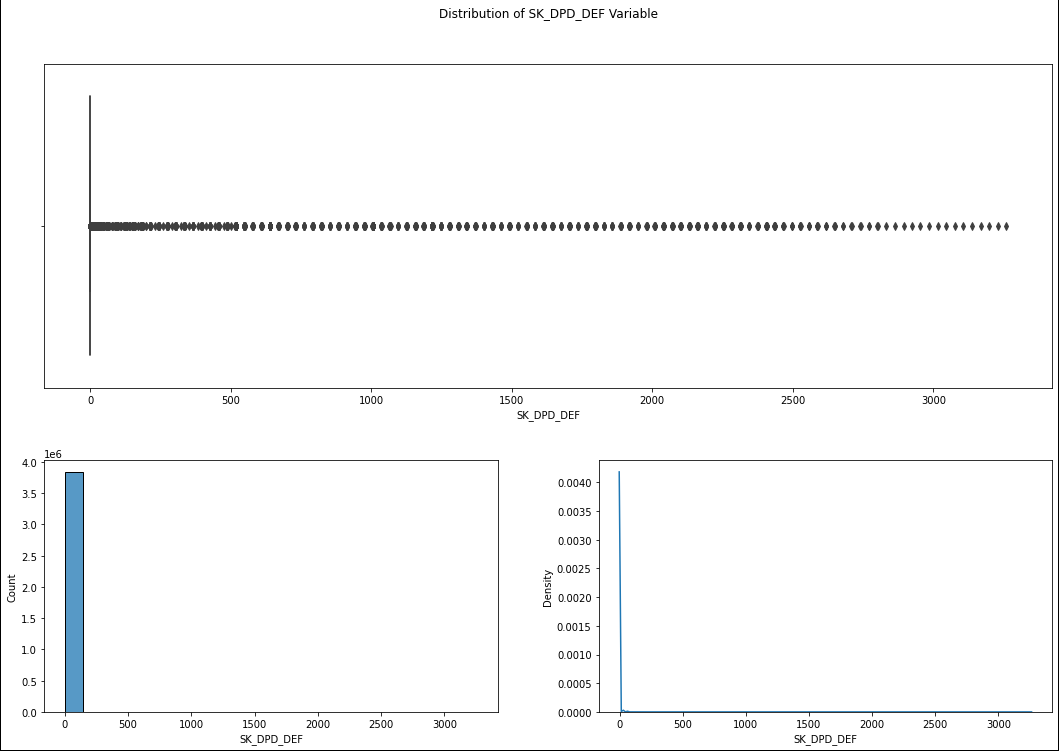

In [60]:
plotter.numeric_distribution(
    title = "Distribution of SK_DPD_DEF Variable",
    data = cc_balance,
    num_col = "SK_DPD_DEF"
)

In [61]:
tab.desc_num_var(cc_balance["SK_DPD_DEF"])

		DESCRIPTION OF THE COLUMN
Minimum                       0.000000
Q1 (25%)                      0.000000
Q2 (50%)                      0.000000
Q3 (75%)                      0.000000
Maximum                    3260.000000
Mean                          0.331622
Median                        0.000000
Mode                          0.000000
Skewness                     89.830434
Kurtosis                   9007.739028
IQR Magnitude                 0.000000
Lower Limit of Whisker        0.000000
Upper Limit of Whisker        0.000000
Number of Outliers        89340.000000
Percentage of Outliers        2.326373
dtype: float64


<h3><div id="3.4">3.4 : Multivariate Analysis</div></h3>

We have performed analysis on the attributes individually. But there's a chance that the variables may be related to each other. This may cause problems for some ML models that are sensitive to *multi-collinearity*. It is therefore reasonable to have a look  at the **correlation** between all the variables and try to find the *reasons* behind high-magnitude correlations (if present).

Since correlation works only on the numeric data, we shall pick the numeric variables for this purpose.

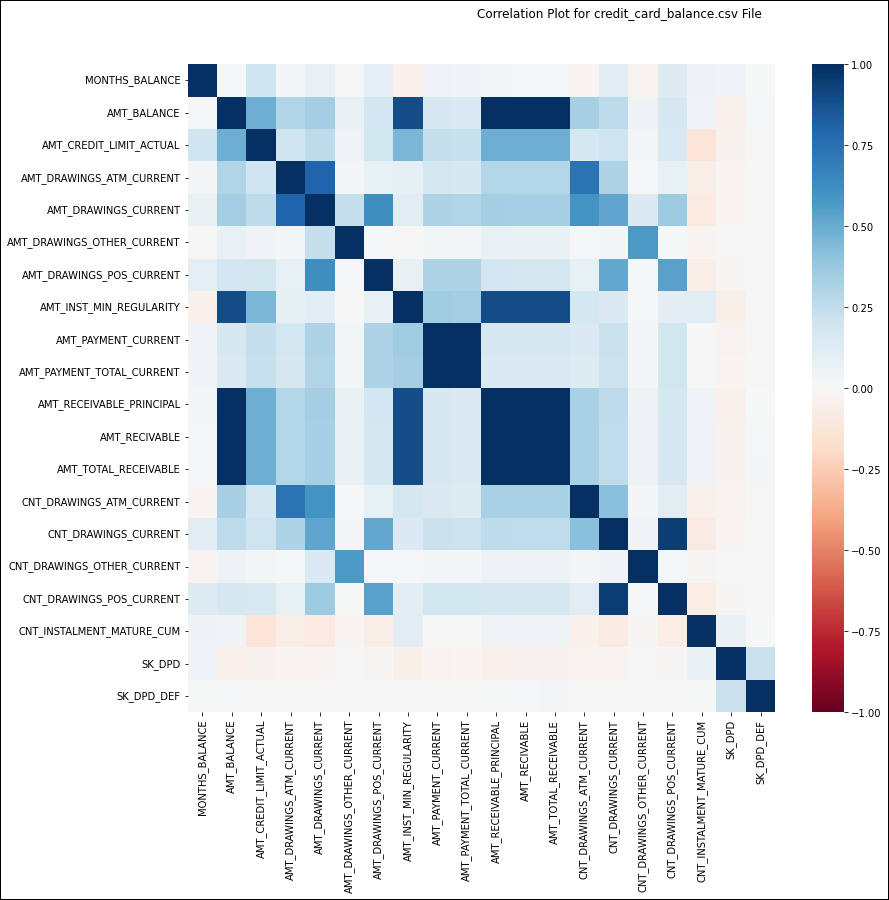

In [62]:
cols = [i for i in range(2,23) if i!=20]
plotter.plot_num_num_corr(
    title = "Correlation Plot for credit_card_balance.csv File",
    data = cc_balance.iloc[:,cols]
)

As observable, many of the features do not show significant correlation. However, the correlation is indeed significant among some of the features:

- The columns **AMT_RECEIVABLE_PRINCIPAL**, **AMT_RECIVABLE** and **AMT_TOTAL_RECEIVABLE** are *very* highly correlated (magnitude almost equal to 1). This can be explained by the fact that these three features are the components/subset of the feature AMT_TOTAL_RECEIVABLE.
- The above three features are also very highly correlated with the feature **AMT_BALANCE**. This can be explained by the fact that AMT_BALANCE is the amount that the client owed, and the *receivable* amount is determined by the amount that is owed.
- Similarly, the above three features are also correlated with the feature **AMT_MIN_REGULARITY**, which is the *minimum* payment that needs to be made. The above three features are more or less *in line with* the feature AMT_MIN_REGULARITY due to the fact that these features are about the payment that the client had to make.
- **AMT_MIN_REGULARITY** is determined (in case of revolving payments) by the amount that is owed i.e. **AMT_BALANCE**. Hence, the high correlation.
- The features **CNT_DRAWINGS_POS_CURRENT** and **CNT_DRAWINGS_CURRENT** are *very* highly correlated. This is because most of payments are made with credit cards *at the POS*. The number of POS withdrawals (i.e. CNT_DRAWINGS_POS_CURRENT in this case) constitute a major share of *all* the withdrawals (i.e. CNT_DRAWINGS_CURRENT in this case), thereby *determining* the *total* withdrawals.
    - This is also the reason why **CNT_DRAWINGS_ATM_CURRENT** and **CNT_DRAWINGS_OTHER_CURRENT** are not as correlated to the feature **CNT_DRAWINGS_CURRENT**. The former two constitute only a *small* portion of the later.

<h2><div id="4">4 : Getting the Resultant Feature Space</div></h2>

Having worked on all the variables, we can observe that there are many outliers in the table (outside the bounds [ Q1-1.5IQR, Q3+1.5IQR ]). This can be inferred from the **Box and Whisker Plots** of various numeric columns (as given above). These outliers have the capacity to affect the feature aggregation.

The table with new features must be aggregated over the **SK_ID_PREV** column. This is to obtain the feature space that is specific to the *previous applications* of the client (which also contains the same SK_ID_PREV column). For feature aggregation using *groupby* method:
* We do not choose the **Mean** as the aggregation criteria because it can be *heavily* influenced by outliers.
* We can choose **Mode** as the aggregation, but this method is best suited for data that is *ordinal/categorical*. Our data is numerical.
* **Median** seems to be the best method in this case, since it works on numerical data and also handles outliers better than the *mean* of the distribution.
* Even from a behavioral point of view, it is possible that a person may not have been able to pay one installment on time due to some reason. This is an *oulier* situation which can be handled by Median.

In [63]:
cc_fs = cc_fe.get_features(cc_balance)
cc_fs.head()

,SK_ID_CURR,CC_CREDIT_UTIL_RATIO,CC_DAYS_TOLERANCE,CC_UNPAID_RATIO,CC_SURCHARGE_RATIO,CC_CNT_DEFAULTS,FLAG_CC_COMPLETED,FLAG_CC_SIGNED,FLAG_CC_REFUSED,FLAG_CC_APPROVED
SK_ID_PREV,,,,,,,,,,
1000018,394447.0,0.909646,0.0,0.00000,0.0,0,0,0,0,0
1000030,361282.0,0.785223,0.0,0.85672,0.0,0,0,0,0,0
1000031,131335.0,0.064505,0.0,0.00000,0.0,0,0,0,0,0
1000035,436351.0,0.000000,0.0,0.00000,0.0,0,0,0,0,0
1000077,181153.0,0.000000,0.0,0.00000,0.0,0,0,0,0,0


<h3><div id="4.1">4.1 : Saving the Feature Space</div></h3>

The Credit Card Payments data, having undergone *Feature Selection* and *Feature Aggregation* to generate the final feature space, is saved for later use. This feature space is ready to be merged with the *organization's previous application records* over the *SK_ID_PREV* column.

In [64]:
cc_fs.to_csv(
    os.path.join(ROOT_DIR,"data","generated","cc_balance.csv")
)